In [3]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [5]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x10f0c4828>)

In [1]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [12]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


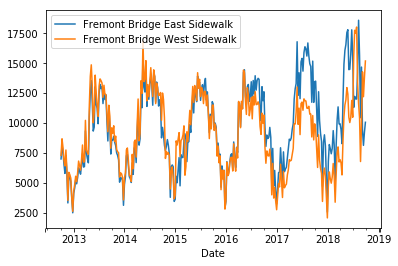

In [15]:
%matplotlib inline
data.resample('W').sum().plot()

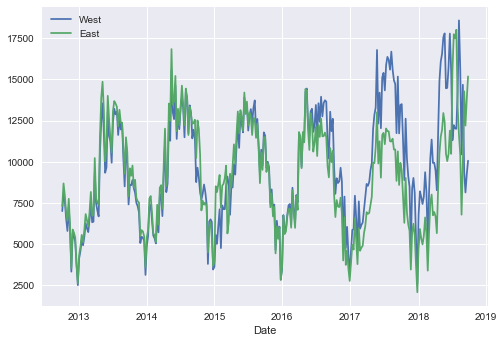

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns=['West','East']
data.resample('W').sum().plot()

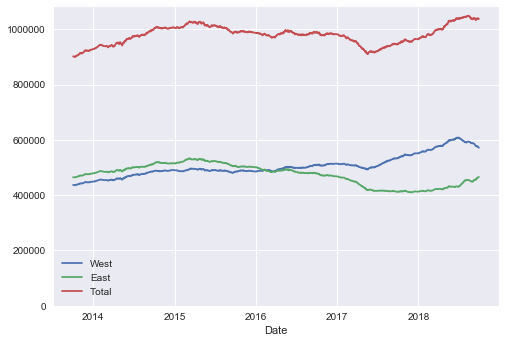

In [21]:
data['Total']=data['West']+data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

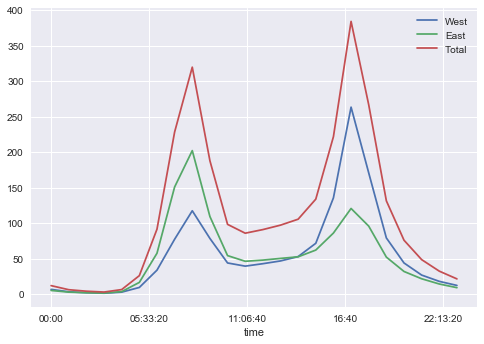

In [22]:
data.groupby(data.index.time).mean().plot();

In [23]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


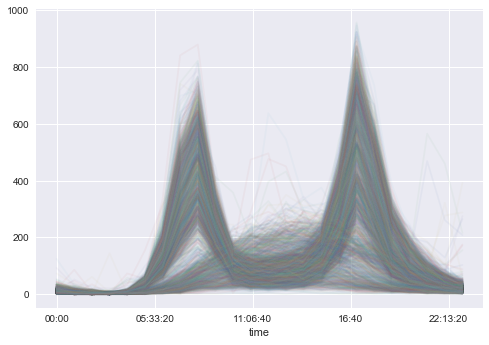

In [26]:
pivoted.plot(legend=False,alpha=0.05);